<a href="https://colab.research.google.com/github/mandar-solanki/GAN-exercises/blob/main/GAN_1018_exercise_1_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
# Loading Github Repo
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/project_folder/AI-Fundamentals-Updated
! git pull


Mounted at /content/gdrive
/content/gdrive/My Drive/project_folder/AI-Fundamentals-Updated
Already up to date.


10/18

In [2]:
! unzip /content/safari.zip -d /content


Archive:  /content/safari.zip
   creating: /content/safari/test/
  inflating: /content/safari/test/elephant.jpg  
  inflating: /content/safari/test/giraffe.jpg  
  inflating: /content/safari/test/lion.jpg  
  inflating: /content/safari/test/zebra.jpg  
   creating: /content/safari/training/
   creating: /content/safari/training/elephant/
  inflating: /content/safari/training/elephant/1.jpg  
  inflating: /content/safari/training/elephant/10.jpg  
  inflating: /content/safari/training/elephant/11.jpg  
  inflating: /content/safari/training/elephant/12.jpg  
  inflating: /content/safari/training/elephant/13.jpg  
  inflating: /content/safari/training/elephant/14.jpg  
  inflating: /content/safari/training/elephant/15.jpg  
  inflating: /content/safari/training/elephant/16.jpg  
  inflating: /content/safari/training/elephant/17.jpg  
  inflating: /content/safari/training/elephant/18.jpg  
  inflating: /content/safari/training/elephant/19.jpg  
  inflating: /content/safari/training/elephan

##Transfer Learning for Safari dataset

resnet, alexnet, mobilenet : 224x224,3
vgg : 112x112

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


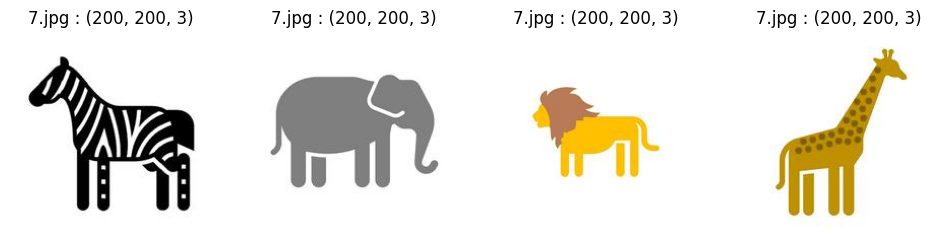

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
#data_path = 'data/safari/training'
data_path = '/content/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

In [4]:
#check data numbers for each catalog
for i in os.listdir(data_path):
    print(f"{i} have {len(os.listdir(os.path.join(data_path, i)))} images")


zebra have 99 images
elephant have 99 images
lion have 99 images
giraffe have 99 images


In [5]:
# Your Code to train a CNN model...
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200,200)
batch_size = 11
tf.random.set_seed(0)

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.3)

train_gen = datagen.flow_from_directory(data_path,
                                         target_size = img_size,
                                         batch_size = batch_size,
                                         class_mode = 'categorical',
                                         subset = 'training')

test_gen = datagen.flow_from_directory(data_path,
                                        target_size = img_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        subset = 'validation')


Found 280 images belonging to 4 classes.
Found 116 images belonging to 4 classes.


In [6]:
class_name = list(train_gen.class_indices.keys())
class_name


['elephant', 'giraffe', 'lion', 'zebra']

In [7]:
from tensorflow.keras.applications.resnet import ResNet101
## include_top == False means model without output layer
base_model = ResNet101(weights = 'imagenet', include_top = False, input_shape = (200,200,3))
print(base_model.summary())


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

None


In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
output_layer = Dense(4, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = output_layer)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 43,059,588 (164.26 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [10]:
num_epochs = 5
history = model.fit(train_gen,
            steps_per_epoch = train_gen.samples//batch_size,
            validation_data = test_gen,
            validation_steps = test_gen.samples//batch_size,
            epochs = num_epochs)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - acc: 0.9917 - loss: 0.0317 - val_acc: 1.0000 - val_loss: 0.0131
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - acc: 1.0000 - loss: 0.0449 - val_acc: 0.8333 - val_loss: 0.1390
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - acc: 1.0000 - loss: 0.0058 - val_acc: 1.0000 - val_loss: 0.0160
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - acc: 1.0000 - loss: 0.0119 - val_acc: 1.0000 - val_loss: 4.1064e-04
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - acc: 1.0000 - loss: 0.0107 - val_acc: 1.0000 - val_loss: 0.0090


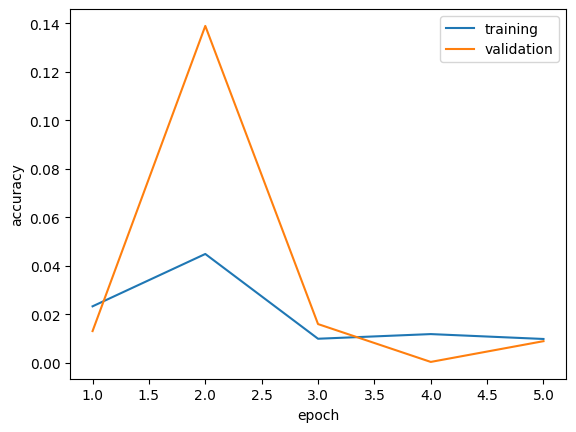

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()
